# Gerontocracy

After hearing a crazy stat - that the US senate has never been older (on average) than it is today, I decided to pull that for a variety of legislative bodies and plot them to find just how geriatric our politics has become.

## US Senators - Extract Data

In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [198]:
import pandas as pd

In [546]:
import importlib
import wiki_utils
importlib.reload(wiki_utils)

<module 'wiki_utils' from '/Users/Daniel_Kats/prog/senator-age/wiki_utils.py'>

In [547]:
url = 'https://en.wikipedia.org/wiki/List_of_current_United_States_senators'

In [548]:
table = wiki_utils.extract_wikitable(url, id="senators")

In [549]:
cols = wiki_utils.extract_wikitable_schema(table)

In [550]:
cols

['State',
 'Image',
 'Senator',
 'Party - 1',
 'Party - 2',
 'Born',
 'Occupation(s)',
 'Previousoffice(s)',
 'Assumed office',
 'Term up',
 'Residence']

In [551]:
rows = wiki_utils.extract_wikitable_content(table, cols)

In [552]:
len(rows)

100

In [553]:
us_sens = pd.DataFrame(rows)

In [554]:
us_sens

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence
0,Alabama,,Richard Shelby,,Republican,"(1934-05-06) May 6, 1934 (age 86)",Lawyer,U.S. HouseAlabama Senate,"January 3, 1987",2022,Tuscaloosa[1]
1,Alabama,,Doug Jones,,Democratic,"(1954-05-04) May 4, 1954 (age 66)",Lawyer,"Staff counsel, U.S. Senate Judiciary Committee...","January 3, 2018[d]",2020,Birmingham[1]
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3]
3,Alaska,,Dan Sullivan,,Republican,"(1964-11-13) November 13, 1964 (age 55)",U.S. Marine Corps officerLawyer,Alaska Attorney GeneralAssistant Secretary of ...,"January 3, 2015",2020,Anchorage[3]
4,Arizona,,Kyrsten Sinema,,Democratic,"(1976-07-12) July 12, 1976 (age 43)",Social workerPolitical activistLawyerCollege p...,U.S. HouseArizona SenateArizona House of Repre...,"January 3, 2019",2024,Phoenix[4]
...,...,...,...,...,...,...,...,...,...,...,...
95,West Virginia,,Shelley Moore Capito,,Republican,"(1953-11-26) November 26, 1953 (age 66)","College career counselorDirector, state Board ...",U.S. HouseWest Virginia House of Delegates,"January 3, 2015",2020,Charleston
96,Wisconsin,,Ron Johnson,,Republican,"(1955-04-08) April 8, 1955 (age 65)",AccountantCorporate executive,None,"January 3, 2011",2022,Oshkosh
97,Wisconsin,,Tammy Baldwin,,Democratic,"(1962-02-11) February 11, 1962 (age 58)",Lawyer,"U.S. HouseWisconsin AssemblyDane County, Wisco...","January 3, 2013",2024,Madison
98,Wyoming,,Mike Enzi,,Republican,"(1944-02-01) February 1, 1944 (age 76)",Nonprofit organization executiveAccountantCEOM...,Wyoming House of RepresentativesWyoming Senate,"January 3, 1997",2020,Gillette


In [555]:
us_sens.shape

(100, 11)

In [556]:
us_sens['Party - 2'].unique()

array(['Republican', 'Democratic', 'Independent[a]'], dtype=object)

In [569]:
us_sens['Born']

0           (1934-05-06) May 6, 1934 (age 86)
1           (1954-05-04) May 4, 1954 (age 66)
2          (1957-05-22) May 22, 1957 (age 62)
3     (1964-11-13) November 13, 1964 (age 55)
4         (1976-07-12) July 12, 1976 (age 43)
                       ...                   
95    (1953-11-26) November 26, 1953 (age 66)
96        (1955-04-08) April 8, 1955 (age 65)
97    (1962-02-11) February 11, 1962 (age 58)
98     (1944-02-01) February 1, 1944 (age 76)
99        (1952-07-21) July 21, 1952 (age 67)
Name: Born, Length: 100, dtype: object

In [581]:
import date_utils
importlib.reload(date_utils)

<module 'date_utils' from '/Users/Daniel_Kats/prog/senator-age/date_utils.py'>

In [570]:
us_sens['wiki_age'] = us_sens['Born'].apply(date_utils.extract_age_from_wikitable)

In [571]:
us_sens['calculated_age'] = us_sens['Born'].apply(date_utils.calculate_age_from_birthday_wikitable)

In [572]:
us_sens[us_sens['calculated_age'] != us_sens['wiki_age']]

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence,wiki_age,calculated_age
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3],62,63
44,Minnesota,,Amy Klobuchar,,Democratic,"(1960-05-25) May 25, 1960 (age 59)",Lawyer,"Hennepin County, Minnesota County Attorney","January 3, 2007",2024,Minneapolis[30],59,60


## age histogram, finally

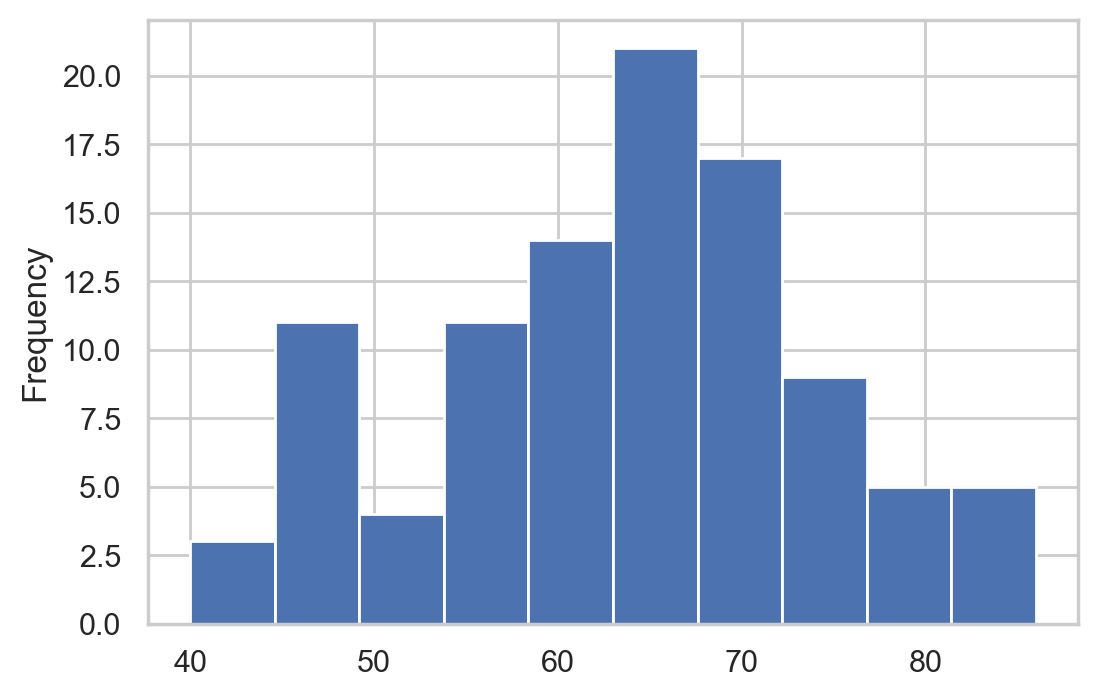

In [573]:
# this shows that the wikipedia age is actually edited-in rather than dynamically calculated

us_sens.calculated_age.plot.hist()

In [566]:
import graph_utils

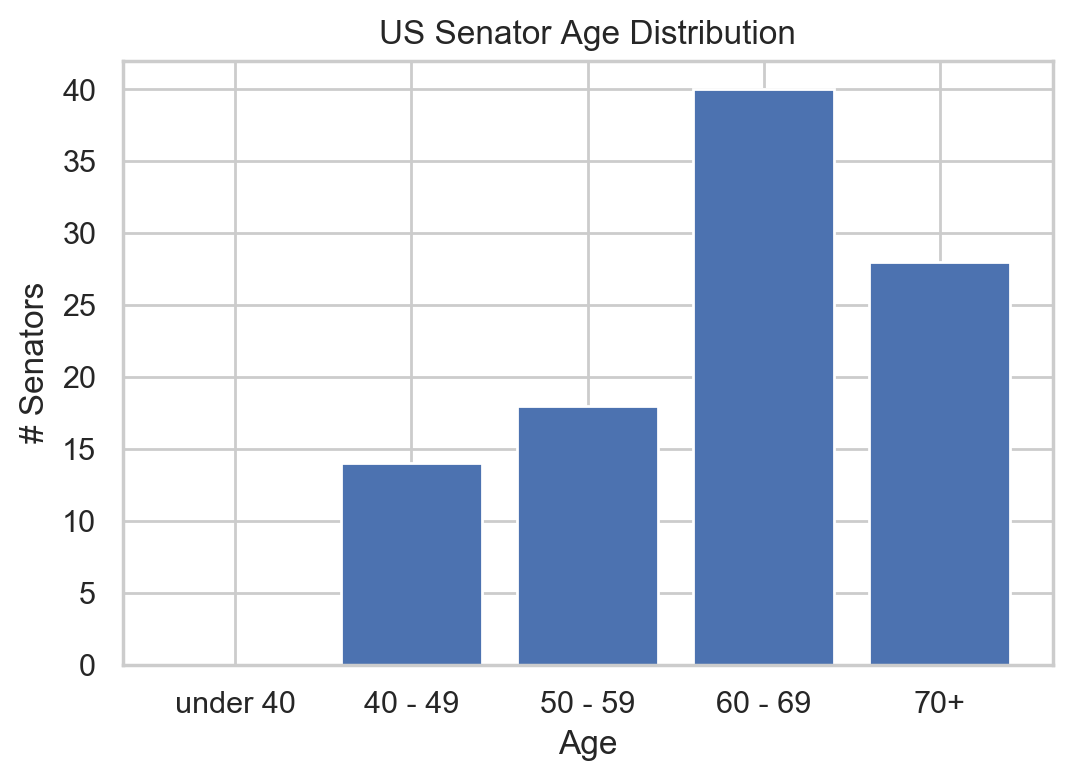

In [586]:
hist_data_us = graph_utils.graph_age_histogram(us_sens, title='US Senator Age Distribution',
                   age_col='calculated_age', y_axis_label='# Senators')

## extract ages of Canadian senators

By law, Canadian senators cannot be older than 75.

In [575]:
url = 'https://en.wikipedia.org/wiki/List_of_current_senators_of_Canada'
table = wiki_utils.extract_wikitable(url)
can_senators = wiki_utils.wikitable_to_dataframe(table)
can_senators

,[8],Name,Senate political affiliation,Province (Division)[a],Date appointed,Appointed on the advice of - 1,Appointed on the advice of - 2,Mandatory retirement date,Titles and notes
0,,Margaret Dawn Anderson,Independent Senators Group,Northwest Territories,"December 12, 2018",,"Trudeau, J.","April 14, 2042",
1,,Salma Ataullahjan,Conservative,Ontario,"July 9, 2010",,Harper,"April 29, 2027",
2,,Denise Batters,Conservative,Saskatchewan,"January 25, 2013",,Harper,"June 18, 2045",
3,,Diane Bellemare,Independent Senators Group,Quebec (Alma),"September 6, 2012",,Harper,"October 13, 2024",Legislative Deputy to Government Representativ...
4,,Wanda Thomas Bernard,Independent Senators Group,Nova Scotia,"November 10, 2016",,"Trudeau, J.","August 1, 2028",
...,...,...,...,...,...,...,...,...,...
91,,Pamela Wallin,Canadian Senators Group,Saskatchewan,"January 2, 2009",,Harper,"April 10, 2028",
92,,David Wells,Conservative,Newfoundland and Labrador,"January 25, 2013",,Harper,"February 28, 2037",
93,,Howard Wetston,Independent Senators Group,Ontario,"November 10, 2016",,"Trudeau, J.","June 3, 2022",
94,,Vernon White,Canadian Senators Group,Ontario,"February 20, 2012",,Harper,"February 21, 2034","Upon his appointment, Senator White said that ..."


In [582]:
can_senators['estimated_age'] = can_senators['Mandatory retirement date'].apply(date_utils.age_from_mandatory_retirement_date)

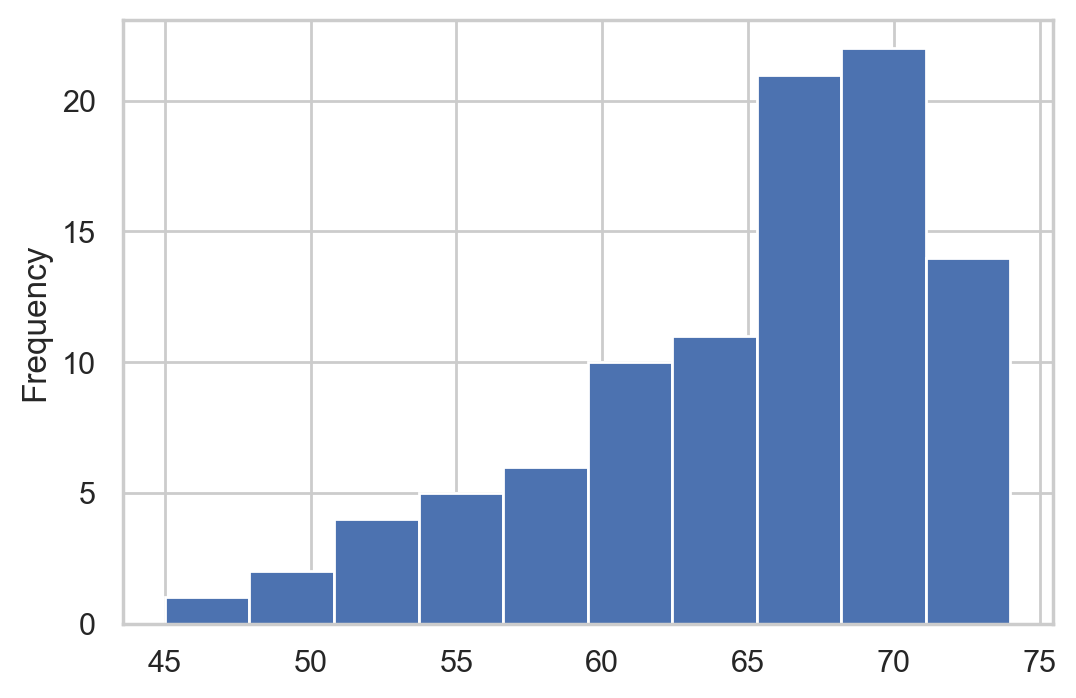

In [583]:
can_senators.estimated_age.plot.hist()

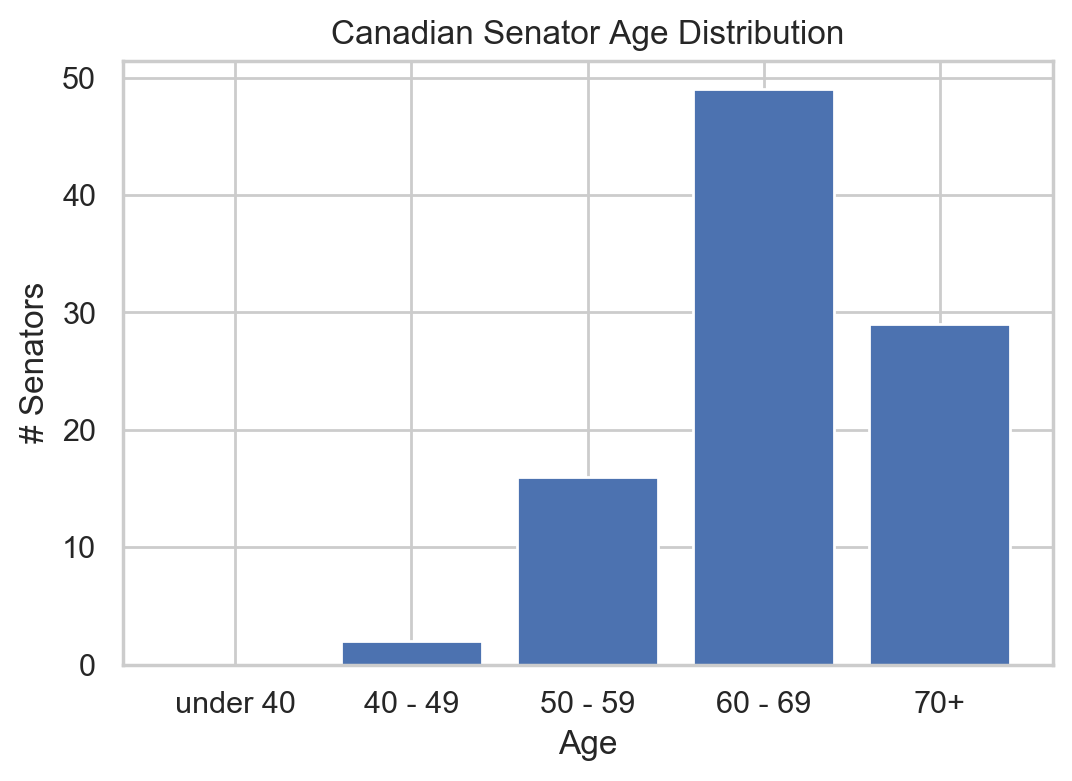

In [585]:
hist_data_ca = graph_utils.graph_age_histogram(can_senators,
                               title='Canadian Senator Age Distribution',
                               age_col='estimated_age',
                               y_axis_label='# Senators')

In [587]:
import seaborn as sns

In [591]:
for row in hist_data_ca:
    row['country'] = 'Canada'
    
hist_data_ca

[{'age_range': 'under 40', 'num_senators': 0, 'country': 'Canada'},
 {'age_range': '40 - 49', 'num_senators': 2, 'country': 'Canada'},
 {'age_range': '50 - 59', 'num_senators': 16, 'country': 'Canada'},
 {'age_range': '60 - 69', 'num_senators': 49, 'country': 'Canada'},
 {'age_range': '70+', 'num_senators': 29, 'country': 'Canada'}]

In [592]:
for row in hist_data_us:
    row['country'] = 'USA'
    
hist_data_us

[{'age_range': 'under 40', 'num_senators': 0, 'country': 'USA'},
 {'age_range': '40 - 49', 'num_senators': 14, 'country': 'USA'},
 {'age_range': '50 - 59', 'num_senators': 18, 'country': 'USA'},
 {'age_range': '60 - 69', 'num_senators': 40, 'country': 'USA'},
 {'age_range': '70+', 'num_senators': 28, 'country': 'USA'}]

In [593]:
hist_rows = hist_data_ca + hist_data_us
hist_rows

[{'age_range': 'under 40', 'num_senators': 0, 'country': 'Canada'},
 {'age_range': '40 - 49', 'num_senators': 2, 'country': 'Canada'},
 {'age_range': '50 - 59', 'num_senators': 16, 'country': 'Canada'},
 {'age_range': '60 - 69', 'num_senators': 49, 'country': 'Canada'},
 {'age_range': '70+', 'num_senators': 29, 'country': 'Canada'},
 {'age_range': 'under 40', 'num_senators': 0, 'country': 'USA'},
 {'age_range': '40 - 49', 'num_senators': 14, 'country': 'USA'},
 {'age_range': '50 - 59', 'num_senators': 18, 'country': 'USA'},
 {'age_range': '60 - 69', 'num_senators': 40, 'country': 'USA'},
 {'age_range': '70+', 'num_senators': 28, 'country': 'USA'}]

In [594]:
hist_data = pd.DataFrame(hist_rows)
hist_data

,age_range,num_senators,country
0,under 40,0,Canada
1,40 - 49,2,Canada
2,50 - 59,16,Canada
3,60 - 69,49,Canada
4,70+,29,Canada
5,under 40,0,USA
6,40 - 49,14,USA
7,50 - 59,18,USA
8,60 - 69,40,USA
9,70+,28,USA


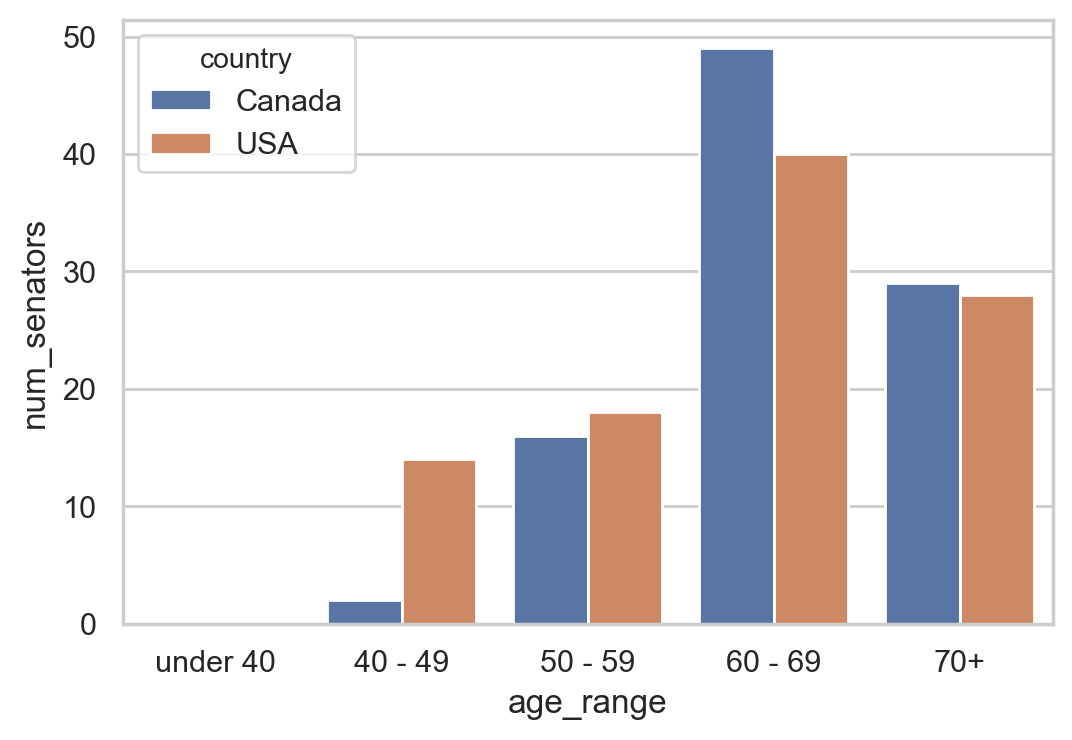

In [595]:
sns.set(style='whitegrid')
ax = sns.barplot(
    x='age_range',
    y='num_senators',
    hue='country',
    data=hist_data
)

## US House of Reps

In [596]:
url = 'https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives'

In [598]:
reps_table = wiki_utils.extract_wikitable(url, id='votingmembers')

In [599]:
reps = wiki_utils.wikitable_to_dataframe(reps_table)

In [600]:
reps.shape

(435, 9)

In [601]:
reps

,District,Member,Party - 1,Party - 2,Prior experience,Education,Assumed office,Residence,Born
0,Alabama 1,Bradley Byrne,,Republican,Alabama SenateAlabama State Board of Education,Duke University (BA)University of Alabama (JD),2014 (Special),Fairhope,1955
1,Alabama 2,Martha Roby,,Republican,"Montgomery, Alabama City Council",New York University (BM)Samford University (JD),2011,Montgomery,1976
2,Alabama 3,Mike Rogers,,Republican,"Calhoun County, Alabama CommissionerAlabama Ho...","Jacksonville State University (BA, MPA)Birming...",2003,Saks,1958
3,Alabama 4,Robert Aderholt,,Republican,"Haleyville, Alabama Municipal Judge",University of North AlabamaBirmingham–Southern...,1997,Haleyville,1965
4,Alabama 5,Mo Brooks,,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,1954
...,...,...,...,...,...,...,...,...,...
430,Wisconsin 5,Jim Sensenbrenner,,Republican,Wisconsin State SenateWisconsin State Assembly,Stanford University (BA)University of Wisconsi...,1979,Menomonee Falls,1943
431,Wisconsin 6,Glenn Grothman,,Republican,Wisconsin SenateWisconsin State Assembly,"University of Wisconsin–Madison (BA, JD)",2015,Campbellsport,1955
432,Wisconsin 7,Tom Tiffany,,Republican,Wisconsin SenateWisconsin State Assembly,University of Wisconsin–River Falls (BS),2020 (Special),Minocqua,1957
433,Wisconsin 8,Mike Gallagher,,Republican,Political advisorU.S. Marine Corps,Princeton University (BA)National Intelligence...,2017,Green Bay,1984


In [602]:
reps[pd.isna(pd.to_numeric(reps.Born))]

,District,Member,Party - 1,Party - 2,Prior experience,Education,Assumed office,Residence,Born
70,California 50,Vacant,,,,,,,
283,New York 27,Vacant,,,,,,,
294,North Carolina 11,Vacant,,,,,,,
364,Texas 4,Vacant,,,,,,,


In [603]:
vacant = reps[reps.Member == 'Vacant']
reps_not_vacant = reps.drop(vacant.index)

In [604]:
reps.shape

(435, 9)

In [605]:
reps_not_vacant.shape

(431, 9)

The "Born" column *only* has the year

In [606]:
reps_not_vacant['Born'] = pd.to_numeric(reps_not_vacant['Born'])

In [275]:
reps_not_vacant.dtypes

District            object
Member              object
Party - 1           object
Party - 2           object
Prior experience    object
Education           object
Assumed office      object
Residence           object
Born                 int64
dtype: object

In [607]:
importlib.reload(date_utils)

<module 'date_utils' from '/Users/Daniel_Kats/prog/senator-age/date_utils.py'>

In [608]:
reps_not_vacant['approx_age'] = reps_not_vacant['Born'].apply(date_utils.calculate_age_from_year)

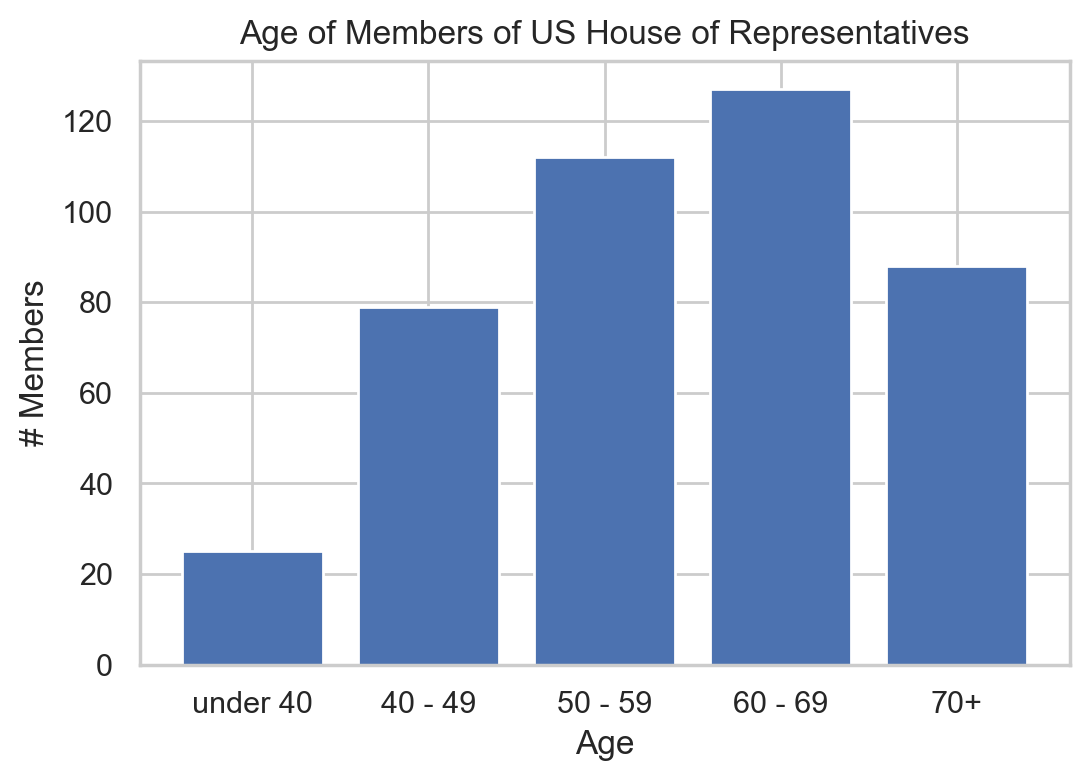

In [610]:
hist_data_us_reps = graph_utils.graph_age_histogram(reps_not_vacant,
                                title='Age of Members of US House of Representatives',
                                age_col='approx_age',
                               y_axis_label='# Members')

## Canadian Parliament

The Wikipedia article splits the members by province, so have to adapt our method to extract multiple tables

In [626]:
importlib.reload(wiki_utils)

<module 'wiki_utils' from '/Users/Daniel_Kats/prog/senator-age/wiki_utils.py'>

In [611]:
url = 'https://en.wikipedia.org/wiki/List_of_House_members_of_the_43rd_Parliament_of_Canada'

In [616]:
canadian_tables = wiki_utils.extract_all_wikitables(url)

/Users/Daniel_Kats/prog/senator-age/wiki_utils.py:82: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 82 of the file /Users/Daniel_Kats/prog/senator-age/wiki_utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(html)


In [613]:
canadian_tables[-1]

<table class="wikitable collapsible">
<tbody><tr>
<th colspan="2" rowspan="2">Number of members<br/>per party by date
</th>
<th>2019
</th></tr>
<tr>
<th>Oct 21
</th></tr>
<tr>
<td style="background:#EA6D6A; width: 16px">
</td>
<td style="width: 180px; text-align:left;"><a href="/wiki/Liberal_Party_of_Canada" title="Liberal Party of Canada">Liberal</a>
</td>
<td>157
</td></tr>
<tr>
<td style="background:#6495ED; width: 16px">
</td>
<td style="width: 180px; text-align:left;"><a href="/wiki/Conservative_Party_of_Canada" title="Conservative Party of Canada">Conservative</a>
</td>
<td>121
</td></tr>
<tr>
<td style="background:#87CEFA; width: 16px">
</td>
<td style="width: 180px; text-align:left;"><a href="/wiki/Bloc_Qu%C3%A9b%C3%A9cois" title="Bloc Québécois">Bloc Québécois</a>
</td>
<td>32
</td></tr>
<tr>
<td style="background:#F4A460; width: 16px">
</td>
<td style="width: 180px; text-align:left;"><a href="/wiki/New_Democratic_Party" title="New Democratic Party">New Democratic</a>
</td>
<t

The last table is a summary table, therefore I will ignore it. Every other table represents a province or region.

In [617]:
frames = []

for table in canadian_tables[:-1]:
    frames.append(wiki_utils.wikitable_to_dataframe(table))
    
frames[0]

,,Name,Party,Electoral district
0,,Blake Richards,Conservative,Banff—Airdrie
1,,Damien Kurek,Conservative,Battle River—Crowfoot
2,,Martin Shields,Conservative,Bow River
3,,Greg McLean,Conservative,Calgary Centre
4,,Len Webber,Conservative,Calgary Confederation
5,,Jasraj Hallan,Conservative,Calgary Forest Lawn
6,,Bob Benzen,Conservative,Calgary Heritage
7,,Stephanie Kusie,Conservative,Calgary Midnapore
8,,Michelle Rempel Garner,Conservative,Calgary Nose Hill
9,,Pat Kelly,Conservative,Calgary Rocky Ridge


### extracting age

Oh tragedy of tragedies, the ages are not present on these pages. Perhaps I can fetch them from the individual pages

let's see if I can actually extract a link to each person

In [648]:
importlib.reload(wiki_utils)
importlib.reload(date_utils)

<module 'date_utils' from '/Users/Daniel_Kats/prog/senator-age/date_utils.py'>

In [624]:
frames = []

for table in canadian_tables[:-1]:
    cols = wiki_utils.extract_wikitable_schema(table)
    rows = wiki_utils.extract_wikitable_content_with_links(table, cols)
    df = pd.DataFrame(rows)
    frames.append(df)
    
frames[0]

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district)
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn
6,,Bob Benzen,/wiki/Bob_Benzen,Conservative,NaN,Calgary Heritage,/wiki/Calgary_Heritage
7,,Stephanie Kusie,/wiki/Stephanie_Kusie,Conservative,NaN,Calgary Midnapore,/wiki/Calgary_Midnapore
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge


In [635]:
for frame in frames:
    frame['age'] = frame['Name_link'].apply(wiki_utils.read_age_from_wikipedia_page)

ERROR:root:ERROR: Failed to extract date from string: 1989 or 1990
ERROR:root:ERROR: failed to extract birthday from string: Greg McLean  is a Canadian politician who was elected to represent the riding of Calgary Centre in the House of Commons of Canada in the 2019 Canadian federal election.  He is an investment portfolio manager.He defeated former cabinet minister Kent Hehr by 20,000 votes.McLean previously served as a director of a public oil and gas company and is currently a director of a private oil and gas services technology company.
ERROR:root:ERROR: failed to extract birthday from string: Jasraj Singh Hallan  is a Canadian politician who was elected to represent the riding of Calgary Forest Lawn in the House of Commons of Canada in the 2019 Canadian federal election. Born in Dubai, he immigrated to Canada as a child and was raised in Calgary. He is a businessman in Calgary, owning a home building business. Hallan previous ran in the 2019 Alberta general election for the ridin

DisambiguationError: "Brenda Shanahan" may refer to: 
Brenda Shanahan (businesswoman)
Brenda Shanahan (politician)

In [649]:
for frame in frames[8:]:
    frame['age'] = frame['Name_link'].apply(wiki_utils.read_age_from_wikipedia_page)

ERROR:root:ERROR: failed to extract birthday from string: Sylvie Bérubé  is a Canadian politician, who was elected to the House of Commons of Canada in the 2019 election. She represents the electoral district of Abitibi—Baie-James—Nunavik—Eeyou as a member of the Bloc Québécois.
ERROR:root:ERROR: failed to extract birthday from string: Sébastien Lemire  is a Canadian politician, who was elected to the  House of Commons of Canada in the 2019 election. He represents the electoral district of Abitibi—Témiscamingue as a member of the Bloc Québécois.
ERROR:root:ERROR: failed to extract birthday from string: Angelo Iacono  is a Canadian Liberal politician, who was elected to represent the riding of Alfred-Pellan in the House of Commons of Canada in the 2015 federal election.Iacono attended McGill University, earning a Bachelor of Arts degree in political science, and then studied law at both the Université du Québec à Montréal (civil law) and the University of Ottawa (common law), as well as

In [650]:
# combine the frames

def combine_frames(frames):
    master_df = pd.DataFrame()
    for frame in frames:
        master_df = master_df.append(frame)
    return master_df.reset_index(drop=True)

master_df = combine_frames(frames)

In [651]:
master_df

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0
...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,63.0
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),60.0
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN


In [653]:
# save these
master_df.to_parquet('data/ca_reps/ca_reps_with_age_from_summary.parquet')

In [654]:
master_df[pd.isna(master_df['age'])]

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,NaN,Calgary Skyview,/wiki/Calgary_Skyview,NaN
...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,NaN,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,NaN,Saskatoon West,/wiki/Saskatoon_West,NaN
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN


In [655]:
missing_members = master_df[pd.isna(master_df['age'])]

### Read dates of birth from Wikipedia Infobox

The previous library only handled summaries. This tool handles Wikipedia infoboxes as well.
Use this tool to try to read the dates of politicians from their wikipedia infoboxes

In [658]:
import wptools

In [659]:
importlib.reload(wiki_utils)
importlib.reload(date_utils)

<module 'date_utils' from '/Users/Daniel_Kats/prog/senator-age/date_utils.py'>

In [660]:
birthdays = missing_members.Name_link.apply(wiki_utils.extract_birth_date_from_infobox)

en.wikipedia.org (parse) Damien Kurek
Damien Kurek (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62125831
  parsetree: <str(9448)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Damien Kurek
  wikibase: Q71920912
  wikidata_url: https://www.wikidata.org/wiki/Q71920912
  wikitext: <str(3746)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Greg McLean (politician)
en.wikipedia.org (imageinfo) File:Greg McLean in Calgary - 2019 (...
Greg McLean (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Greg McLe...
  infobox: <dict(13)> name, honorific-suffix, image, caption, ridi...
  pageid: 62125806
  parsetree: <str(5094)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Greg McLean (politician)
  wikibase: Q71920931
  wikidata_url: https://www.wikidata.org/wiki/Q71920931
  wikitext: <str(2846)> {{Infobox officeho

{'alma_mater': '[[University of Alberta]]',
 'caption': 'McLean in Calgary in 2019',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Greg McLean in Calgary - 2019 (48231547782) (cropped).jpg',
 'name': 'Greg McLean',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Kent Hehr]]',
 'profession': '[[Member of Parliament]]',
 'residence': '[[Calgary]], [[Alberta]]',
 'riding': '[[Calgary Centre]]',
 'spouse': 'Ruth',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:JasrajSinghHallan.jpg
Jasraj Hallan (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:JasrajSin...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62125711
  parsetree: <str(10967)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Jasraj Hallan
  wikibase: Q71921024
  wikidata_url: https://www.wikidata.org/wiki/Q71921024
  wikitext: <str(4255)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Pat Kelly (politician)


{'birth_place': '[[Dubai]], [[United Arab Emirates]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'JasrajSinghHallan.jpg',
 'imagesize': '200px',
 'name': 'Jasraj Singh Hallan',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Deepak Obhrai]]',
 'residence': '[[Calgary]], [[Alberta]]',
 'riding': '[[Calgary Forest Lawn]]',
 'term_start': 'October 21, 2019'}


Pat Kelly (politician) (en) data
{
  infobox: <dict(15)> name, honorific-suffix, imagesize, office, l...
  pageid: 48297813
  parsetree: <str(14845)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Pat Kelly (politician)
  wikibase: Q22278561
  wikidata_url: https://www.wikidata.org/wiki/Q22278561
  wikitext: <str(5276)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Jag Sahota
en.wikipedia.org (imageinfo) File:Jag Sahota (cropped).jpg
Jag Sahota (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Jag Sahot...
  infobox: <dict(13)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62125866
  parsetree: <str(10208)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Jag Sahota
  wikibase: Q71920891
  wikidata_url: https://www.wikidata.org/wiki/Q71920891
  wikitext: <str(3516)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Matt Jeneroux
e

{'birth_place': '[[Evansburg, Alberta]], Canada',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'imagesize': '200px',
 'name': 'Gerald Soroka',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Jim Eglinski]]',
 'riding': '[[Yellowhead (electoral district)|Yellowhead]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:MPDoherty.png
Todd Doherty (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MPDoherty...
  infobox: <dict(17)> name, image, office, leader, term_start, pre...
  pageid: 48300058
  parsetree: <str(12341)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Todd Doherty
  wikibase: Q22277600
  wikidata_url: https://www.wikidata.org/wiki/Q22277600
  wikitext: <str(5727)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Tamara Jansen
Tamara Jansen (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62127429
  parsetree: <str(8678)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Tamara Jansen
  wikibase: Q71942375
  wikidata_url: https://www.wikidata.org/wiki/Q71942375
  wikitext: <str(3193)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Alistair MacGregor
Alistair MacGregor

{'alma_mater': '[[University of Victoria]]<br />[[Royal Roads University]]',
 'birth_place': '[[Victoria, British Columbia]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Alistair MacGregor',
 'parliament': 'Canadian',
 'party': '[[New Democratic Party]]',
 'predecessor': '[[Jean Crowder]]',
 'profession': 'Executive Assistant',
 'residence': '[[Duncan, British Columbia]]',
 'riding': '[[Cowichan—Malahat—Langford]]',
 'term_start': 'October 19, 2015'}


Tracy Gray (en) data
{
  infobox: <dict(17)> name, honorific-suffix, imagesize, riding1, ...
  pageid: 62127321
  parsetree: <str(24863)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Tracy Gray
  wikibase: Q71936974
  wikidata_url: https://www.wikidata.org/wiki/Q71936974
  wikitext: <str(19069)> {{Infobox officeholder| honorific-prefix ...
}
en.wikipedia.org (parse) Rob Morrison (politician)
Rob Morrison (politician) (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127354
  parsetree: <str(8724)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Rob Morrison (politician)
  wikibase: Q71936954
  wikidata_url: https://www.wikidata.org/wiki/Q71936954
  wikitext: <str(2997)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Brad Vis


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Rob Morrison',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Wayne Stetski]]',
 'profession': 'public servant',
 'residence': '[[Creston, British Columbia]]',
 'riding': '[[Kootenay—Columbia]]',
 'term_start': 'October 21, 2019'}


Brad Vis (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127421
  parsetree: <str(4490)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Brad Vis
  wikibase: Q71942395
  wikidata_url: https://www.wikidata.org/wiki/Q71942395
  wikitext: <str(2048)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Paul Manly
en.wikipedia.org (imageinfo) File:Paul Manly, MP.jpg
Paul Manly (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Paul Manl...
  infobox: <dict(14)> name, honorific-suffix, image, riding1, parl...
  pageid: 60686533
  parsetree: <str(10714)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Paul Manly
  wikibase: Q63565674
  wikidata_url: https://www.wikidata.org/wiki/Q63565674
  wikitext: <str(7776)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Rachel Blaney
en.wikipedia.org (imageinfo) File:R

{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Taylor Bachrach',
 'parliament': 'Canadian',
 'party': '[[New Democratic Party]]',
 'predecessor': '[[Nathan Cullen]]',
 'riding': '[[Skeena—Bulkley Valley]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Kenny Chiu (cropped).jpg
Kenny Chiu (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Kenny Chi...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62127217
  parsetree: <str(14126)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Kenny Chiu
  wikibase: Q71937003
  wikidata_url: https://www.wikidata.org/wiki/Q71937003
  wikitext: <str(5304)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Laurel Collins


{'birth_place': '[[Hong Kong]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Kenny Chiu (cropped).jpg',
 'imagesize': '200px',
 'name': 'Kenny Chiu',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Joe Peschisolido]]',
 'profession': 'Software engineer',
 'riding': '[[Steveston—Richmond East]]',
 'term_start': 'October 21, 2019'}


Laurel Collins (en) data
{
  infobox: <dict(15)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127402
  parsetree: <str(7340)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Laurel Collins
  wikibase: Q71942460
  wikidata_url: https://www.wikidata.org/wiki/Q71942460
  wikitext: <str(4527)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Patrick Weiler
Patrick Weiler (en) data
{
  infobox: <dict(13)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127304
  parsetree: <str(9743)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Patrick Weiler
  wikibase: Q71936984
  wikidata_url: https://www.wikidata.org/wiki/Q71936984
  wikitext: <str(3780)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Dan Mazier
Dan Mazier (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126025
  parsetree: <str(8850)> <root><temp

{'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'imagesize': '200px',
 'name': 'René Arseneault',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Bernard Valcourt]]',
 'profession': 'Attorney',
 'riding': '[[Madawaska—Restigouche]]',
 'spouse': 'Michèle Pelletier',
 'term_start': 'October 19, 2015'}


Ginette Petitpas Taylor (en) data
{
  infobox: <dict(31)> honorific-prefix, name, honorific-suffix, of...
  pageid: 48296739
  parsetree: <str(21322)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Ginette Petitpas Taylor
  wikibase: Q21714336
  wikidata_url: https://www.wikidata.org/wiki/Q21714336
  wikitext: <str(9670)> {{Infobox CanadianMP| honorific-prefix =[[...
}
en.wikipedia.org (parse) Richard Bragdon


{'alma_mater': '[[Université de Moncton]]',
 'birth_place': '[[Dieppe, New Brunswick]], Canada',
 'honorific-prefix': '[[The Honourable]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|PC|MP|size|=|100%}}',
 'minister3': '[[Bill Morneau]]',
 'name': 'Ginette Petitpas Taylor',
 'office': '[[Party Whip (Canada)|Deputy Government Whip]]',
 'office2': '[[Minister of Health (Canada)|Minister of Health]]',
 'office3': '[[Parliamentary Secretary]] to the [[Minister of Finance '
            '(Canada)|Minister of Finance]]',
 'parliament4': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Linda Lapointe]]',
 'predecessor1': '[[Dave MacKenzie (politician)|Dave MacKenzie]]',
 'predecessor2': '[[Jane Philpott]]',
 'predecessor3': '[[François-Philippe Champagne]]',
 'predecessor4': '[[Robert Goguen]]',
 'primeminister': '[[Justin Trudeau]]',
 'primeminister1': '[[Justin Trudeau]]',
 'primeminister2': '[[Justin Trudeau]]',
 'riding4': '[[Moncton—Riverview—Dieppe

Richard Bragdon (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62124922
  parsetree: <str(13606)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Richard Bragdon
  wikibase: Q71894607
  wikidata_url: https://www.wikidata.org/wiki/Q71894607
  wikitext: <str(4381)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Mike Kelloway
Mike Kelloway (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126104
  parsetree: <str(9249)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Mike Kelloway
  wikibase: Q71930000
  wikidata_url: https://www.wikidata.org/wiki/Q71930000
  wikitext: <str(3175)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Carol Hughes (politician)
en.wikipedia.org (imageinfo) File:Carol Hughes.jpg
Carol Hughes (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'f

{'birth_place': '[[Montreal]], [[Quebec]]',
 'caption': 'Brassard in 2019',
 'image': 'John Brassard - 2019 (47899551081) (cropped).jpg',
 'leader': '[[Andrew Scheer]]',
 'leader2': '[[Rona Ambrose]]<br />[[Andrew Scheer]]',
 'name': 'John Brassard',
 'office': '[[Party Whip (Canada)|Deputy Opposition Whip]]',
 'office2': '[[Minister of Veterans Affairs (Canada)|Official Opposition '
            'Critic for Veterans Affairs]]',
 'office3': '[[Barrie City Council]]lor',
 'parliament1': 'Canadian',
 'predecessor': '[[Dave MacKenzie (politician)|Dave MacKenzie]]',
 'predecessor1': "''Riding established''",
 'predecessor2': '[[Alupa Clarke]]',
 'predecessor3': 'Steve Trotter',
 'riding1': '[[Barrie—Innisfil]]',
 'successor2': '[[Steven Blaney]]',
 'successor3': 'Andrew Prince',
 'term_end2': 'August 29, 2017',
 'term_end3': 'November 2, 2015',
 'term_start': 'August 29, 2017',
 'term_start1': 'October 19, 2015',
 'term_start2': 'October 16, 2016',
 'term_start3': 'November 13, 2006'}


Doug Shipley (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126273
  parsetree: <str(8896)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Doug Shipley
  wikibase: Q71929954
  wikidata_url: https://www.wikidata.org/wiki/Q71929954
  wikitext: <str(3365)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Nathaniel Erskine-Smith
en.wikipedia.org (imageinfo) File:HOC-2019-1122-BT-15-371-2.jpg
Nathaniel Erskine-Smith (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:HOC-2019-...
  infobox: <dict(14)> name, honorific-suffix, image, riding, parli...
  iwlinks: <list(1)> https://en.wikiquote.org/wiki/Special:Search/...
  pageid: 48304559
  parsetree: <str(38692)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Nathaniel Erskine-Smith
  wikibase: Q20676568
  wikidata_url: https://www.wikidata.org/wiki/Q20676568
  wikitext: <str(2

{'alma_mater': '[[McGill University]]<br />[[University of British Columbia]]',
 'birth_place': '[[Toronto|Toronto, Ontario]], Canada',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Julie Dzerowicz.jpg',
 'imagesize': '200px',
 'name': 'Julie Dzerowicz',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Andrew Cash]]',
 'residence': '[[Davenport, Toronto|Davenport, Toronto, Ontario]]',
 'riding': '[[Davenport (electoral district)|Davenport]]',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Han Dong - 2018 (cropped).jpg
Han Dong (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Han Dong ...
  infobox: <dict(21)> name, native_name, honorific-suffix, image, ...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:H...
  pageid: 43043951
  parsetree: <str(23871)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Han Dong (politician)
  wikibase: Q17183113
  wikidata_url: https://www.wikidata.org/wiki/Q17183113
  wikitext: <str(13630)> {{short description|Canadian politician|b...
}
en.wikipedia.org (parse) Erin O'Toole
en.wikipedia.org (imageinfo) File:Erin O'Toole.jpg
Erin O'Toole (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': "File:Erin O'To...
  infobox: <dict(27)> honorific-prefix, honorific-suffix, image, c...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:E...
  pageid: 37756081
  parsetree: <str(25379)> <root><templat

{'allegiance': 'Canada',
 'alma_mater': '[[Royal Military College of Canada|Royal Military College]] '
               '([[Bachelor of Arts|BA]])<br />[[Dalhousie University]] '
               '([[Bachelor of Laws|LLB]])',
 'birth_name': "Erin Michael O'Toole",
 'birth_place': '[[Montreal]], [[Quebec]], Canada',
 'branch': '[[Royal Canadian Air Force|Canadian Forces Air Command]]',
 'caption': "O'Toole in 2014",
 'honorific-prefix': '[[Captain (Canadian army and air force)|Captain]] [[the '
                     'Honourable]]',
 'honorific-suffix': "[[Queen's Privy Council of Canada|PC]] [[Canadian Forces "
                     'Decoration|CD]] [[Member of Parliament (Canada)|MP]]',
 'image': "Erin O'Toole.jpg",
 'mawards': "[[Canadian Forces' Decoration]]<br>[[Sikorsky Aircraft|Sikorsky "
            'Helicopter Rescue Award]]',
 'office1': '[[Minister of Veterans Affairs (Canada)|Minister of Veterans '
            'Affairs]]',
 'parliament2': 'Canadian',
 'party': '[[Conservative Party

Chris Lewis (politician) (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126549
  parsetree: <str(8730)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Chris Lewis (politician)
  wikibase: Q81142481
  wikidata_url: https://www.wikidata.org/wiki/Q81142481
  wikitext: <str(3219)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) James Maloney (Canadian politician)
James Maloney (Canadian politician) (en) data
{
  infobox: <dict(17)> name, honorific-suffix, constituency_MP, par...
  pageid: 43240076
  parsetree: <str(6952)> <root><template><title>Infobox Canadian M...
  requests: <list(1)> parse
  title: James Maloney (Canadian politician)
  wikibase: Q17386312
  wikidata_url: https://www.wikidata.org/wiki/Q17386312
  wikitext: <str(4068)> {{Infobox Canadian MP| honorific-prefix = ...
}
en.wikipedia.org (parse) Jamie Schmale
en.wikipedia.org (imageinfo) File:MPSchmale.png
Jamie Schmale 

{'children': 'Declan',
 'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'MPSchmale.png',
 'imagesize': '200px',
 'name': 'Jamie Schmale',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor': '[[Barry Devolin]]',
 'residence': '[[Ottawa, Ontario| Ottawa]]',
 'riding': '[[Haliburton—Kawartha Lakes—Brock]]',
 'spouse': 'Julia Schmale',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Councillor Matthew Green.jpg
Matthew Green (Canadian politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Councillo...
  infobox: <dict(16)> name, honorific-suffix, image, caption, ridi...
  pageid: 62131751
  parsetree: <str(11365)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Matthew Green (Canadian politician)
  wikibase: Q85784352
  wikidata_url: https://www.wikidata.org/wiki/Q85784352
  wikitext: <str(3825)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Scott Duvall
en.wikipedia.org (imageinfo) File:MP Scott Duvall (cropped).jpg
Scott Duvall (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MP Scott ...
  infobox: <dict(19)> name, honorific-suffix, image, office1, term...
  pageid: 48298045
  parsetree: <str(15508)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Scott Duvall
  wikibas

{'alma_mater': '[[University of Guelph]]',
 'birth_place': '[[Beirut]], [[Lebanon]]',
 'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'Marwan_Tabbara.jpeg',
 'imagesize': '200px',
 'name': 'Marwan Tabbara',
 'nationality': '[[Canadians|Canadian]]',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': 'District Created',
 'residence': '[[Kitchener, Ontario]]',
 'riding': '[[Kitchener South—Hespeler]]',
 'term_start': 'October 19, 2015'}


Lindsay Mathyssen (en) data
{
  infobox: <dict(11)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127446
  parsetree: <str(8994)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Lindsay Mathyssen
  wikibase: Q71942357
  wikidata_url: https://www.wikidata.org/wiki/Q71942357
  wikitext: <str(3299)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Kate Young (politician)
Kate Young (politician) (en) data
{
  infobox: <dict(18)> name, imagesize, office, minister, term_star...
  pageid: 48298516
  parsetree: <str(18407)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Kate Young (politician)
  wikibase: Q22811363
  wikidata_url: https://www.wikidata.org/wiki/Q22811363
  wikitext: <str(7841)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Gagan Sikand


{'imagesize': '200px',
 'minister': '[[Kirsty Duncan]]',
 'minister2': '[[Marc Garneau]]',
 'name': 'Kate Young',
 'office': '[[Parliamentary Secretary]] to the [[Minister of Science '
           '(Canada)|Minister of Science]]',
 'office2': '[[Parliamentary Secretary]] to the [[Minister of Transport '
            '(Canada)|Minister of Transport]]',
 'parliament3': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Terry Beech]]',
 'predecessor2': '[[Jeff Watson (politician)|Jeff Watson]]',
 'predecessor3': '[[Ed Holder]]',
 'profession': 'public relations manager, former [[television news anchor]]',
 'riding3': '[[London West]]',
 'successor2': '[[Karen McCrimmon]]',
 'term_end2': 'January 27, 2017',
 'term_start': 'January 30, 2017',
 'term_start2': 'December 2, 2015',
 'term_start3': 'October 19, 2015'}


Gagan Sikand (en) data
{
  infobox: <dict(12)> name, honorific-suffix, riding, parliament, ...
  pageid: 48304084
  parsetree: <str(13534)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Gagan Sikand
  wikibase: Q22704271
  wikidata_url: https://www.wikidata.org/wiki/Q22704271
  wikitext: <str(7252)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Chandra Arya
en.wikipedia.org (imageinfo) File:Chandra Arya 20171012.jpg
Chandra Arya (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Chandra A...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 48298079
  parsetree: <str(10754)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Chandra Arya
  wikibase: Q22276872
  wikidata_url: https://www.wikidata.org/wiki/Q22276872
  wikitext: <str(4050)> {{short description|Canadian Liberal polit...
}
en.wikipedia.org (parse) Tony Van Bynen


{'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'Chandra Arya 20171012.jpg',
 'imagesize': '200px',
 'name': 'Chandra Arya',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''District created''",
 'religion': '[[Hindu]]',
 'residence': '[[Ottawa]], [[Ontario]]',
 'riding': '[[Nepean (electoral district)|Nepean]]',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Tony Van Bynen.jpg
Tony Van Bynen (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Tony Van ...
  infobox: <dict(11)> name, honorific-suffix, image, birth_date, b...
  pageid: 29404135
  parsetree: <str(7707)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Tony Van Bynen
  wikibase: Q7823611
  wikidata_url: https://www.wikidata.org/wiki/Q7823611
  wikitext: <str(5248)> {{Infobox officeholder | honorific_prefix ...
}
en.wikipedia.org (parse) Tony Baldinelli
Tony Baldinelli (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126524
  parsetree: <str(12305)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Tony Baldinelli
  wikibase: Q71929868
  wikidata_url: https://www.wikidata.org/wiki/Q71929868
  wikitext: <str(3751)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Dean Allison
Dean Alliso

{'birth_place': '[[Rayside-Balfour#Chelmsford|Chelmsford]], [[Ontario]], '
                'Canada',
 'education': '[[Laurentian University]]',
 'imagesize': '200px',
 'name': 'Marc Serré',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Claude Gravelle]]',
 'riding': '[[Nickel Belt]]',
 'term_start': 'October 19, 2015'}


Philip Lawrence (politician) (en) data
{
  infobox: <dict(9)> name, honorific-suffix, riding, parliament, t...
  pageid: 62127442
  parsetree: <str(9716)> <root><template><title>BLP sources</title...
  requests: <list(1)> parse
  title: Philip Lawrence (politician)
  wikibase: Q85793092
  wikidata_url: https://www.wikidata.org/wiki/Q85793092
  wikitext: <str(4102)> {{BLP sources|date=April 2020}}{{Infobox o...
}
en.wikipedia.org (parse) Anita Anand (professor)


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Philip Lawrence',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Kim Rudd]]',
 'profession': 'Financial Planner, Lawyer',
 'riding': '[[Northumberland—Peterborough South]]',
 'spouse': 'Natasha Lawrence',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Minister Anand - Official Photo...
Anita Anand (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Minister ...
  infobox: <dict(18)> honorific-prefix, name, honorific-suffix, im...
  pageid: 61752870
  parsetree: <str(28026)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Anita Anand
  wikibase: Q67442310
  wikidata_url: https://www.wikidata.org/wiki/Q67442310
  wikitext: <str(18724)> {{short description|Canadian politician a...
}
en.wikipedia.org (parse) Pam Damoff
Pam Damoff (en) data
{
  infobox: <dict(16)> name, parliament, predecessor, riding, party...
  pageid: 48304430
  parsetree: <str(12827)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Pam Damoff
  wikibase: Q22277495
  wikidata_url: https://www.wikidata.org/wiki/Q22277495
  wikitext: <str(6399)> {{short description|Canadian Liberal polit...
}
en.wikipedia.org (parse) Marie-France Lalonde
en.wik

{'birth_place': '[[Ottawa]], [[Ontario]], Canada',
 'honorific-prefix': '[[The Honourable]]',
 'honorific-suffix': "[[Queen's Privy Council for Canada|PC]] [[Member of "
                     'Parliament (Canada)|MP]]',
 'name': 'Mona Fortier',
 'office': '[[Minister of Middle Class Prosperity]]<br />[[Department of '
           'Finance (Canada)|Associate Minister of Finance]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Position created''",
 'predecessor1': '[[Mauril Bélanger]]',
 'primeminister': '[[Justin Trudeau]]',
 'riding1': '[[Ottawa—Vanier]]',
 'term_start': 'November 20, 2019',
 'term_start1': 'April 3, 2017'}


en.wikipedia.org (imageinfo) File:Scott Aitchison (cropped).jpg
Scott Aitchison (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Scott Ait...
  infobox: <dict(12)> name, honorific-suffix, image, caption, imag...
  pageid: 62125650
  parsetree: <str(9100)> <root><template><title>short description<...
  requests: <list(2)> parse, imageinfo
  title: Scott Aitchison
  wikibase: Q71912401
  wikidata_url: https://www.wikidata.org/wiki/Q71912401
  wikitext: <str(3378)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Jennifer O'Connell
Jennifer O'Connell (en) data
{
  infobox: <dict(24)> name, honorific-suffix, imagesize, riding, p...
  pageid: 48304105
  parsetree: <str(16374)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Jennifer O'Connell
  wikibase: Q22279457
  wikidata_url: https://www.wikidata.org/wiki/Q22279457
  wikitext: <str(7392)> {{Infobox CanadianMP| honorific-prefix = |...
}
en.wikipedia.org (parse) 

{'alma_mater': '[[University of London]]<br />[[Quaid-i-Azam University]]',
 'awards': '[[Queen Elizabeth II Diamond Jubilee Medal]]',
 'birth_place': '[[Coventry]], England, UK',
 'citizenship': '{{hlist|Canada|Pakistan}}',
 'image': 'Zahid headshot.jpg',
 'imagesize': '180px',
 'name': 'Salma Zahid',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Roxanne James]]',
 'residence': '[[Scarborough, Toronto]], Ontario',
 'riding': '[[Scarborough Centre (electoral district)|Scarborough Centre]]',
 'term_start': 'October 19, 2015'}


Gary Anandasangaree (en) data
{
  infobox: <dict(14)> name, native_name, native_name_lang, honorif...
  pageid: 48304920
  parsetree: <str(16461)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Gary Anandasangaree
  wikibase: Q21160212
  wikidata_url: https://www.wikidata.org/wiki/Q21160212
  wikitext: <str(11640)> {{Infobox CanadianMP| honorific-prefix =|...
}
en.wikipedia.org (parse) Terry Dowdall


{'alma_mater': '{{Ubl|[[Carleton University]]|[[York University]]}}',
 'birth_place': '[[Sri Lanka]]',
 'blank1': 'Ethnicity',
 'data1': '[[Sri Lankan Tamil people|Sri Lankan Tamil]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'name': 'Gary Anandasangaree',
 'native_name': 'கரி ஆனந்தசங்கரி',
 'native_name_lang': 'ta',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Riding Established''",
 'profession': 'Lawyer',
 'riding': '[[Scarborough—Rouge Park]]',
 'term_start': 'October 19, 2015'}


Terry Dowdall (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62126509
  parsetree: <str(9493)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Terry Dowdall
  wikibase: Q71929888
  wikidata_url: https://www.wikidata.org/wiki/Q71929888
  wikitext: <str(3331)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Ryan Turnbull (politician)
Ryan Turnbull (politician) (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126661
  parsetree: <str(4117)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Ryan Turnbull (politician)
  wikibase: Q71929780
  wikidata_url: https://www.wikidata.org/wiki/Q71929780
  wikitext: <str(1989)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Michael Levitt (politician)
Michael Levitt (politician) (en) data
{
  image: <list(0)> 
  infobox: <dict(14)> name, honorific

{'birth_place': '[[Georgina, Ontario]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'ScotDavidson.jpg',
 'imagesize': '200px',
 'name': 'Scot Davidson',
 'parliament1': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor1': '[[Peter Van Loan]]',
 'riding1': '[[York—Simcoe]]',
 'term_start1': 'February 25, 2019'}


Sylvie Bérubé (en) data
{
  infobox: <dict(8)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62132440
  parsetree: <str(8682)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Sylvie Bérubé
  wikibase: Q72093411
  wikidata_url: https://www.wikidata.org/wiki/Q72093411
  wikitext: <str(2846)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Sébastien Lemire


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Sylvie Bérubé',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Roméo Saganash]]',
 'riding': '[[Abitibi—Baie-James—Nunavik—Eeyou]]',
 'term_start': 'October 21, 2019'}


Sébastien Lemire (en) data
{
  infobox: <dict(7)> name, honorific-suffix, riding, parliament, t...
  pageid: 62132462
  parsetree: <str(3402)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Sébastien Lemire
  wikibase: Q72177965
  wikidata_url: https://www.wikidata.org/wiki/Q72177965
  wikitext: <str(1592)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Angelo Iacono


{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'name': 'Sébastien Lemire',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Christine Moore (politician)|Christine Moore]]',
 'riding': '[[Abitibi—Témiscamingue]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Angelo Iacono - OSCE - Minsk - ...
Angelo Iacono (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Angelo Ia...
  infobox: <dict(14)> name, image, caption, riding, parliament, te...
  pageid: 48304293
  parsetree: <str(14951)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Angelo Iacono
  wikibase: Q22080847
  wikidata_url: https://www.wikidata.org/wiki/Q22080847
  wikitext: <str(5504)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Kristina Michaud
Kristina Michaud (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62131114
  parsetree: <str(9631)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Kristina Michaud
  wikibase: Q71973951
  wikidata_url: https://www.wikidata.org/wiki/Q71973951
  wikitext: <str(3674)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Carol

{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Kristina Michaud',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Rémi Massé]]',
 'residence': '[[Amqui, Quebec]]',
 'riding': '[[Avignon—La Mitis—Matane—Matapédia]]',
 'term_start': 'October 21, 2019'}


Caroline Desbiens (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  iwlinks: <list(1)> https://fr.wikipedia.org/wiki/Caroline_Desbiens
  pageid: 62132480
  parsetree: <str(10344)> <root><template><title>Expand French</ti...
  requests: <list(1)> parse
  title: Caroline Desbiens
  wikibase: Q72091608
  wikidata_url: https://www.wikidata.org/wiki/Q72091608
  wikitext: <str(4028)> {{Expand French|date=February 2020}}{{shor...
}
en.wikipedia.org (parse) Julie Vignola


{'birth_place': "[[L'Isle-aux-Coudres]], Quebec, Canada",
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Caroline Desbiens',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Sylvie Boucher]]',
 'riding': "[[Beauport—Côte-de-Beaupré—Île d'Orléans—Charlevoix]]",
 'term_start': 'October 21, 2019'}


Julie Vignola (en) data
{
  infobox: <dict(9)> name, honorific-suffix, riding, parliament, t...
  pageid: 62132521
  parsetree: <str(9268)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Julie Vignola
  wikibase: Q71991319
  wikidata_url: https://www.wikidata.org/wiki/Q71991319
  wikitext: <str(3435)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Yves Perron


{'birth_place': '[[Sept-Îles, Quebec]], Canada',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Julie Vignola',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Alupa Clarke]]',
 'residence': '[[Quebec City]], [[Quebec]]',
 'riding': '[[Beauport—Limoilou]]',
 'term_start': 'October 21, 2019'}


Yves Perron (en) data
{
  infobox: <dict(8)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62132546
  parsetree: <str(10105)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Yves Perron
  wikibase: Q72219741
  wikidata_url: https://www.wikidata.org/wiki/Q72219741
  wikitext: <str(3514)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Lyne Bessette


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Yves Perron',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Ruth Ellen Brosseau]]',
 'riding': '[[Berthier—Maskinongé]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Bessette0206 243.jpg
Lyne Bessette (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bessette0...
  infobox: <dict(13)> name, honorific-suffix, image, imagesize, ri...
  pageid: 2585670
  parsetree: <str(20095)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Lyne Bessette
  wikibase: Q460720
  wikidata_url: https://www.wikidata.org/wiki/Q460720
  wikitext: <str(14846)> {{short description|Canadian cyclist}}{{U...
}
en.wikipedia.org (parse) Pierre Paul-Hus
en.wikipedia.org (imageinfo) File:Pierre Paul-Hus - fête national...
Pierre Paul-Hus (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Pierre Pa...
  infobox: <dict(21)> name, honorific-suffix, image, office, leade...
  pageid: 48304496
  parsetree: <str(20818)> <root><template><title>Infobox CanadianM...
  requests: <list(2)> parse, imageinfo
  title: Pierre Paul-Hus
  wikibase: Q21158711
  wikidata_url: https://www.wi

{'imagesize': '200px',
 'name': 'Brenda Shanahan',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Sylvain Chicoine]]',
 'profession': 'banker, financial advisor, columnist',
 'residence': '[[Châteauguay]], [[Quebec]]',
 'riding': '[[Châteauguay—Lacolle]]',
 'term_start': 'October 19, 2015'}


Anju Dhillon (en) data
{
  infobox: <dict(17)> name, imagesize, office, minister, term_star...
  pageid: 48304317
  parsetree: <str(12197)> <root><template><title>Use mdy dates</ti...
  requests: <list(1)> parse
  title: Anju Dhillon
  wikibase: Q21572945
  wikidata_url: https://www.wikidata.org/wiki/Q21572945
  wikitext: <str(5665)> {{Use mdy dates|date=May 2020}}{{short des...
}
en.wikipedia.org (parse) Soraya Martinez Ferrada


{'alma_mater': '[[Concordia University]]<br />[[Université de Montréal]]',
 'birth_place': '[[Montreal|Montreal, Quebec]], Canada',
 'imagesize': '200px',
 'minister': '[[Patty Hajdu]]<br />[[Maryam Monsef]]',
 'name': 'Anju Dhillon',
 'office': '[[Parliamentary Secretary]] for [[Minister of Status of '
           'Women|Status of Women]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Susan Truppe]]',
 'predecessor1': "''district created''",
 'profession': 'Attorney',
 'religion': '[[Sikhism]]',
 'riding1': '[[Dorval—Lachine—LaSalle]]',
 'successor': '[[Terry Duguid]]',
 'term_end': 'January 27, 2017',
 'term_start': 'December 2, 2015',
 'term_start1': 'October 19, 2015'}


Soraya Martinez Ferrada (en) data
{
  infobox: <dict(14)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62134100
  parsetree: <str(12114)> <root><template><title>Use Canadian Engl...
  requests: <list(1)> parse
  title: Soraya Martinez Ferrada
  wikibase: Q72012015
  wikidata_url: https://www.wikidata.org/wiki/Q72012015
  wikitext: <str(4858)> {{Use Canadian English|date=April 2020}}{{...
}
en.wikipedia.org (parse) Gabriel Ste-Marie


{'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'imagesize': '200px',
 'name': 'Soraya Martinez Ferrada',
 'office2': '[[Montreal City Council]]lor for Saint-Michel',
 'otherparty': '[[Vision Montreal]] (2005–2009)',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor1': '[[Marjolaine Boutin-Sweet]]',
 'residence': '[[Montreal]], [[Quebec]]',
 'riding': '[[Hochelaga (electoral district)|Hochelaga]]',
 'successor2': '[[Frantz Benjamin]]',
 'term_end2': '[[2009 Montreal municipal election|November 2, 2009]]',
 'term_start1': 'October 21, 2019',
 'term_start2': '[[2005 Montreal municipal election|November 6, 2005]]'}


Gabriel Ste-Marie (en) data
{
  infobox: <dict(11)> name, honorific-suffix, caption, riding, par...
  pageid: 48307901
  parsetree: <str(15454)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Gabriel Ste-Marie
  wikibase: Q21177259
  wikidata_url: https://www.wikidata.org/wiki/Q21177259
  wikitext: <str(5909)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Mario Simard


{'caption': "Ste-Marie's official parliamentary photo",
 'honorific-suffix': '[[Member of parliament|MP]]',
 'name': 'Gabriel Ste-Marie',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Francine Raynault]]',
 'profession': 'Economist, Teacher',
 'residence': '[[Joliette]], [[Quebec]], Canada',
 'riding': '[[Joliette (electoral district)|Joliette]]',
 'term_start': 'October 19, 2015'}


Mario Simard (en) data
{
  infobox: <dict(8)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62132777
  parsetree: <str(8190)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Mario Simard
  wikibase: Q72219402
  wikidata_url: https://www.wikidata.org/wiki/Q72219402
  wikitext: <str(2659)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Marilène Gill


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Mario Simard',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Karine Trudel]]',
 'riding': '[[Jonquière (electoral district)|Jonquière]]',
 'term_start': 'October 21, 2019'}


Marilène Gill (en) data
{
  infobox: <dict(14)> name, honorific-suffix, caption, riding, par...
  pageid: 48308070
  parsetree: <str(9985)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Marilène Gill
  wikibase: Q21167969
  wikidata_url: https://www.wikidata.org/wiki/Q21167969
  wikitext: <str(4382)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Luc Berthold
en.wikipedia.org (imageinfo) File:BertholdMP.jpg
Luc Berthold (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:BertholdM...
  infobox: <dict(20)> name, honorific-suffix, image, imagesize, of...
  pageid: 48298545
  parsetree: <str(20503)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Luc Berthold
  wikibase: Q21891834
  wikidata_url: https://www.wikidata.org/wiki/Q21891834
  wikitext: <str(6206)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Simon Marcil
Simon Marcil (en) data
{

{'caption': "Marcil's official parliamentary photo",
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Simon Marcil',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': "''Riding established''",
 'residence': '[[Mirabel, Quebec]]',
 'riding': '[[Mirabel (electoral district)|Mirabel]]',
 'term_start': 'October 19, 2015'}


Sameer Zuberi (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62134256
  parsetree: <str(10391)> <root><template><title>for</title><part>...
  requests: <list(1)> parse
  title: Sameer Zuberi
  wikibase: Q72012003
  wikidata_url: https://www.wikidata.org/wiki/Q72012003
  wikitext: <str(3610)> {{for|the Scottish doctor|Sameer Zuberi (p...
}
en.wikipedia.org (parse) Will Amos
Will Amos (en) data
{
  infobox: <dict(13)> name, imagesize, riding, parliament, term_st...
  pageid: 48304907
  parsetree: <str(23270)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Will Amos
  wikibase: Q22276800
  wikidata_url: https://www.wikidata.org/wiki/Q22276800
  wikitext: <str(11107)> {{short description|Canadian politician|b...
}
en.wikipedia.org (parse) Monique Pauzé
Monique Pauzé (en) data
{
  infobox: <dict(10)> name, honorific-suffix, riding, parliament, ...
  pageid: 48308674
  parsetree: <str(14898)> <root><template><titl

{'caption': 'Desilets official parliamentary photo',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Luc Desilets',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Linda Lapointe]]',
 'riding': '[[Rivière-des-Mille-Îles (electoral '
           'district)|Rivière-des-Mille-Îles]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Rhéal Fortin BQ.jpg
Rhéal Fortin (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Rhéal For...
  infobox: <dict(22)> name, honorific-suffix, image, office, term_...
  pageid: 48310343
  parsetree: <str(21225)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Rhéal Fortin
  wikibase: Q21159929
  wikidata_url: https://www.wikidata.org/wiki/Q21159929
  wikitext: <str(9332)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Simon-Pierre Savard-Tremblay


{'birth_name': 'Rhéal Éloi Fortin',
 'birth_place': '[[Laval-des-Rapides, Quebec]], Canada',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Rhéal Fortin BQ.jpg',
 'name': 'Rhéal Fortin',
 'office': 'Spokesperson of [[Québec debout]]<br /> {{small|Groupe '
           'parlementaire québécois (March — June)}}',
 'office2': 'Leader of the [[Bloc Québécois]] <br /> {{small|Interim}}',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament3': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': "''Caucus founded''",
 'predecessor2': '[[Gilles Duceppe]]',
 'predecessor3': '[[Pierre Dionne Labelle]]',
 'profession': 'Lawyer',
 'riding3': '[[Rivière-du-Nord (electoral district)|Rivière-du-Nord]]',
 'successor': "''Caucus dissolved''",
 'successor2': '[[Martine Ouellet]]',
 'term_end': 'September 17, 2018',
 'term_end2': 'March 18, 2017',
 'term_start': 'March 21, 2018',
 'term_start2': 'October 22, 2015',
 'term_start3': 'October 19, 20

en.wikipedia.org (imageinfo) File:Simon-Pierre Savard-Tremblay.png
Simon-Pierre Savard-Tremblay (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Simon-Pie...
  infobox: <dict(12)> name, honorific-suffix, image, caption, ridi...
  pageid: 62133539
  parsetree: <str(10345)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Simon-Pierre Savard-Tremblay
  wikibase: Q30302772
  wikidata_url: https://www.wikidata.org/wiki/Q30302772
  wikitext: <str(4807)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Christine Normandin
Christine Normandin (en) data
{
  infobox: <dict(8)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62133640
  parsetree: <str(9203)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Christine Normandin
  wikibase: Q72219274
  wikidata_url: https://www.wikidata.org/wiki/Q72219274
  wikitext: <str(3031)> {{Infobox officeholder| honorific-prefix 

{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Christine Normandin',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Jean Rioux]]',
 'riding': '[[Saint-Jean (electoral district)|Saint-Jean]]',
 'term_start': 'October 21, 2019'}


Patricia Lattanzio (en) data
{
  infobox: <dict(13)> name, office1, term_start1, predecessor1, su...
  pageid: 48618863
  parsetree: <str(8257)> <root><template><title>pp</title><part><n...
  requests: <list(1)> parse
  title: Patricia Lattanzio
  wikibase: Q22006190
  wikidata_url: https://www.wikidata.org/wiki/Q22006190
  wikitext: <str(3473)> {{pp|small=yes}}{{Infobox officeholder| ho...
}
en.wikipedia.org (parse) Andréanne Larouche


{'constituency1': '[[Saint-Léonard—Saint-Michel]]',
 'name': 'Patricia Lattanzio',
 'office1': 'Member of the [[House of Commons of Canada]]',
 'office2': '[[Montreal City Council]]lor for [[Saint-Leonard, '
            'Quebec|Saint-Léonard-Est]]',
 'otherparty': '[[Équipe Denis Coderre]]',
 'party': '[[Liberal Party of Canada]]',
 'predecessor1': '[[Domenico Moschella]]',
 'predecessor2': '[[Domenico Moschella]]',
 'successor1': '[[Nicola Di Iorio]]',
 'successor2': "''TBA''",
 'term_end2': '2019',
 'term_start1': 'October 21, 2019',
 'term_start2': 'November 15, 2015'}


Andréanne Larouche (en) data
{
  infobox: <dict(7)> name, honorific-suffix, riding, parliament, t...
  pageid: 62133661
  parsetree: <str(8507)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Andréanne Larouche
  wikibase: Q72012161
  wikidata_url: https://www.wikidata.org/wiki/Q72012161
  wikitext: <str(2819)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Élisabeth Brière


{'honorific-suffix': '[[Member of parliament|MP]]',
 'name': 'Andréanne Larouche',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Pierre Breton]]',
 'riding': '[[Shefford (electoral district)|Shefford]]',
 'term_start': 'October 21, 2019'}


Élisabeth Brière (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62133806
  parsetree: <str(3296)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Élisabeth Brière
  wikibase: Q72012105
  wikidata_url: https://www.wikidata.org/wiki/Q72012105
  wikitext: <str(1612)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Louise Chabot


{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Élisabeth Brière',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada]]',
 'predecessor': '[[Pierre-Luc Dusseault]]',
 'residence': '[[Sherbrooke]], [[Quebec]]',
 'riding': '[[Sherbrooke (electoral district)|Sherbrooke]]',
 'term_start': 'October 21, 2019'}


Louise Chabot (en) data
{
  infobox: <dict(8)> name, honorific-suffix, caption, riding, parl...
  pageid: 62133600
  parsetree: <str(9207)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Louise Chabot
  wikibase: Q3263709
  wikidata_url: https://www.wikidata.org/wiki/Q3263709
  wikitext: <str(2886)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Louise Charbonneau


{'caption': "Chabot's official parliamentary photo",
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Louise Chabot',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Ramez Ayoub]]',
 'riding': '[[Thérèse-De Blainville]]',
 'term_start': 'October 21, 2019'}


Louise Charbonneau (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62133610
  parsetree: <str(3832)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Louise Charbonneau
  wikibase: Q72219699
  wikidata_url: https://www.wikidata.org/wiki/Q72219699
  wikitext: <str(1754)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Annie Koutrakis


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Louise Charbonneau',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Robert Aubin]]',
 'residence': '[[Trois-Rivières]], [[Quebec]]',
 'riding': '[[Trois-Rivières (electoral district)|Trois-Rivières]]',
 'term_start': 'October 21, 2019'}


Annie Koutrakis (en) data
{
  infobox: <dict(10)> name, honorific-suffix, riding, parliament, ...
  pageid: 62133847
  parsetree: <str(4121)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Annie Koutrakis
  wikibase: Q72012050
  wikidata_url: https://www.wikidata.org/wiki/Q72012050
  wikitext: <str(2295)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Rosemarie Falk


{'birth_place': '[[Montreal]], [[Quebec]]',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Annie Koutrakis',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Eva Nassif]]',
 'profession': 'Politician',
 'residence': '[[Laval, Quebec]]',
 'riding': '[[Vimy (electoral district)|Vimy]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Rosemarie Falk in the House of ...
Rosemarie Falk (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Rosemarie...
  infobox: <dict(17)> name, honorific-suffix, image, alt, caption,...
  pageid: 62291940
  parsetree: <str(20113)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Rosemarie Falk
  wikibase: Q42666524
  wikidata_url: https://www.wikidata.org/wiki/Q42666524
  wikitext: <str(10432)> {{Infobox officeholder| honorific-prefix ...
}
en.wikipedia.org (parse) Jeremy Patzer
Jeremy Patzer (en) data
{
  infobox: <dict(12)> name, honorific-suffix, riding, parliament, ...
  pageid: 62125905
  parsetree: <str(8632)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Jeremy Patzer
  wikibase: Q71920882
  wikidata_url: https://www.wikidata.org/wiki/Q71920882
  wikitext: <str(3214)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Gary Vidal
G

{'birth_place': '[[Saskatoon]], [[Saskatchewan]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Kevin Waugh',
 'office1': 'Saskatchewan Conservative Caucus Chair',
 'office2': '[[Saskatoon Public School Division]] Trustee',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor': '[[Lynne Yelich]]',
 'predecessor1': '[[Randy Hoback]]',
 'predecessor2': 'Lindsay Fast',
 'profession': 'Broadcaster',
 'riding': '[[Saskatoon—Grasswood]]',
 'spouse': 'Ann Waugh',
 'successor2': 'Charmaine Bellamy',
 'term_end2': 'October 27, 2015',
 'term_start': 'October 19, 2015',
 'term_start1': 'December 4, 2019',
 'term_start2': 'November 1, 2006'}


en.wikipedia.org (imageinfo) File:CoreyTochor.jpg
Corey Tochor (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:CoreyToch...
  infobox: <dict(24)> image, imagesize, honorific-suffix, riding, ...
  pageid: 33684335
  parsetree: <str(10712)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Corey Tochor
  wikibase: Q5170456
  wikidata_url: https://www.wikidata.org/wiki/Q5170456
  wikitext: <str(5012)> {{Infobox officeholder| image         = Fi...
}
en.wikipedia.org (parse) Brad Redekopp
en.wikipedia.org (imageinfo) File:Brad Redekopp (cropped).jpg
Brad Redekopp (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Brad Rede...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62126965
  parsetree: <str(7289)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Brad Redekopp
  wikibase: Q71937029
  wikidata_url: https://www.wikidata.org/wiki/Q

{'birth_place': '[[Poole]], [[Dorset]], [[England]]',
 'children': 'Andrew<br />Kathryn<br />Stephen',
 'honorific-prefix': '[[Doctor (title)|Doctor]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'MPKitchen.jpg',
 'imagesize': '200px',
 'leader': '[[Andrew Scheer]]',
 'name': 'Robert Kitchen',
 'office': '[[Minister for Sport|Shadow Minister for Sport]]',
 'parliament1': 'Canadian',
 'party': 'Conservative',
 'predecessor': '[[Matthew Dubé]]',
 'predecessor1': '[[Ed Komarnicki]]',
 'profession': 'Chiropractor',
 'residence': '[[Estevan]], [[Saskatchewan]], Canada',
 'riding1': '[[Souris—Moose Mountain]]',
 'spouse': 'Donna Kitchen',
 'term_start': 'November 19, 2015',
 'term_start1': 'October 19, 2015'}


Mumilaaq Qaqqaq (en) data
{
  infobox: <dict(13)> name, native_name, native_name_lang, honorif...
  pageid: 62126171
  parsetree: <str(15884)> <root><template><title>Use dmy dates</ti...
  requests: <list(1)> parse
  title: Mumilaaq Qaqqaq
  wikibase: Q71942614
  wikidata_url: https://www.wikidata.org/wiki/Q71942614
  wikitext: <str(11712)> {{Use dmy dates|date=May 2020}}{{Infobox ...
}


In [661]:
missing_members['infobox_birthday'] = birthdays

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [662]:
missing_members

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,infobox_birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}}
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}}
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,NaN,Calgary Skyview,/wiki/Calgary_Skyview,NaN,{{Birth year and age|1978}}
...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,None
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,NaN,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,{{Birth based on age as of date|42|2019|10|7|m...
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,NaN,Saskatoon West,/wiki/Saskatoon_West,NaN,{{Birth based on age as of date|54|2019|10|6|m...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None


In [665]:
missing_members[pd.isna(missing_members['infobox_birthday'])].shape

(45, 9)

In [677]:
importlib.reload(wiki_utils)

<module 'wiki_utils' from '/Users/Daniel_Kats/prog/senator-age/wiki_utils.py'>

In [671]:
missing_members['infobox_birthday'].apply(wiki_utils.extract_birthday_from_infobox_macro)

1      None
3      None
5      None
9      None
12     None
       ... 
330    None
331    None
332    None
333    None
336    None
Name: infobox_birthday, Length: 110, dtype: object

In [668]:
missing_members[~pd.isna(missing_members['infobox_birthday'])]['infobox_birthday']

1         {{Birth based on age as of date|29|2019|9|25}}
9         {{Birth based on age as of date|44|2015|8|26}}
12                           {{Birth year and age|1978}}
17        {{Birth based on age as of date|30|2012|1|16}}
25                           {{birth year and age|1986}}
                             ...                        
327    {{Birth based on age as of date|37|2019|10|6|m...
328            {{birth date and age|df|=|yes|1979|5|20}}
331    {{Birth based on age as of date|42|2019|10|7|m...
332    {{Birth based on age as of date|54|2019|10|6|m...
336      {{Birth based on age as of date|26|2019|11|13}}
Name: infobox_birthday, Length: 65, dtype: object

In [672]:
missing_members

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,infobox_birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}}
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}}
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,NaN,Calgary Skyview,/wiki/Calgary_Skyview,NaN,{{Birth year and age|1978}}
...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,None
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,NaN,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,{{Birth based on age as of date|42|2019|10|7|m...
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,NaN,Saskatoon West,/wiki/Saskatoon_West,NaN,{{Birth based on age as of date|54|2019|10|6|m...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None


In [678]:
missing_members['parsed_birthday'] = missing_members['infobox_birthday'].apply(wiki_utils.extract_birthday_from_infobox_macro)
missing_members

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,infobox_birthday,parsed_birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}},1990-09-25
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None,NaT
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None,NaT
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}},1971-08-26
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,NaN,Calgary Skyview,/wiki/Calgary_Skyview,NaN,{{Birth year and age|1978}},1978-01-01
...,...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,None,NaT
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,NaN,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,{{Birth based on age as of date|42|2019|10|7|m...,1977-10-07
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,NaN,Saskatoon West,/wiki/Saskatoon_West,NaN,{{Birth based on age as of date|54|2019|10|6|m...,1965-10-06
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None,NaT


In [679]:
missing_members['approx_age'] = missing_members.parsed_birthday.apply(date_utils.get_age_from_birthday)

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [680]:
missing_members

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,infobox_birthday,parsed_birthday,approx_age
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}},1990-09-25,29.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None,NaT,NaN
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None,NaT,NaN
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}},1971-08-26,48.0
12,,Jag Sahota,/wiki/Jag_Sahota,Conservative,NaN,Calgary Skyview,/wiki/Calgary_Skyview,NaN,{{Birth year and age|1978}},1978-01-01,42.0
...,...,...,...,...,...,...,...,...,...,...,...
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,None,NaT,NaN
331,,Corey Tochor,/wiki/Corey_Tochor,Conservative,NaN,Saskatoon—University,/wiki/Saskatoon%E2%80%94University,NaN,{{Birth based on age as of date|42|2019|10|7|m...,1977-10-07,42.0
332,,Brad Redekopp,/wiki/Brad_Redekopp,Conservative,NaN,Saskatoon West,/wiki/Saskatoon_West,NaN,{{Birth based on age as of date|54|2019|10|6|m...,1965-10-06,54.0
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None,NaT,NaN


In [681]:
master_df

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0
...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,63.0
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),60.0
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN


In [682]:
missing_members['approx_age']

1      29.0
3       NaN
5       NaN
9      48.0
12     42.0
       ... 
330     NaN
331    42.0
332    54.0
333     NaN
336    26.0
Name: approx_age, Length: 110, dtype: float64

In [683]:
new_age = master_df['age'].fillna(missing_members['approx_age'])
master_df['new_age'] = new_age

In [685]:
master_df[pd.isna(master_df['new_age'])].shape

(45, 9)

In [686]:
master_df

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,29.0
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0,72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0,59.0
...,...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,63.0,63.0
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),60.0,60.0
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN,26.0


In [687]:
master_df.to_parquet('data/ca_reps/ca_reps_with_age_from_2.parquet')

In [688]:
can_reps_with_age = master_df[~pd.isna(master_df['new_age'])]

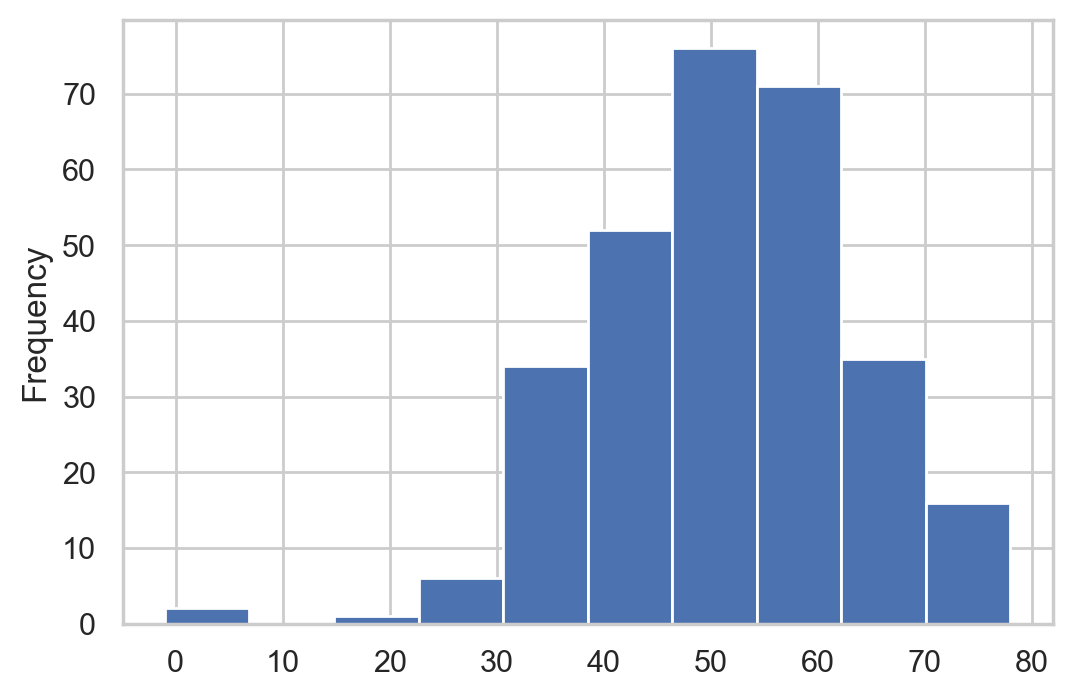

In [689]:
can_reps_with_age.new_age.plot.hist()

In [690]:
can_reps_with_age.new_age.min()

-1.0

In [693]:
idx = can_reps_with_age[can_reps_with_age.new_age == -1].index
idx

Int64Index([127, 212], dtype='int64')

In [696]:
import numpy as np

can_reps_with_age.loc[idx, 'age'] = np.NaN
can_reps_with_age.loc[idx, 'new_age'] = np.NaN

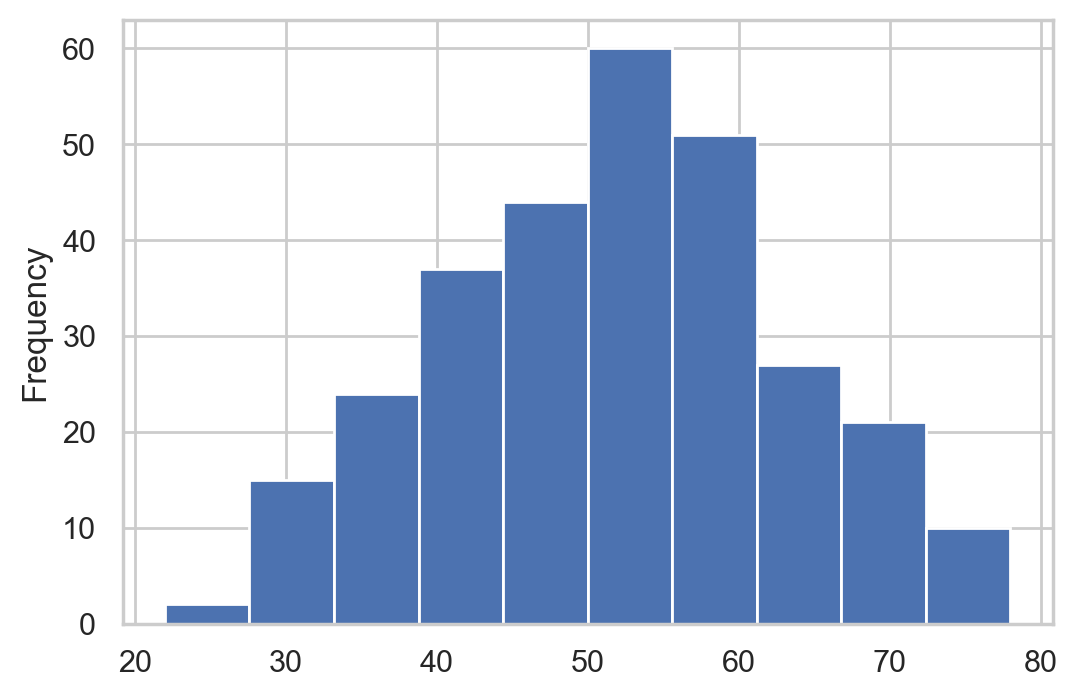

In [697]:
can_reps_with_age.new_age.plot.hist()

In [698]:
can_reps_with_age.new_age.min()

22.0

In [699]:
can_reps_with_age[can_reps_with_age.new_age == 22.0]

,,Name,Name_link,Party,Party_link,Electoral district,Electoral district_link,age,new_age
161,,Eric Melillo,/wiki/Eric_Melillo,Conservative,NaN,Kenora,/wiki/Kenora_(electoral_district),22.0,22.0


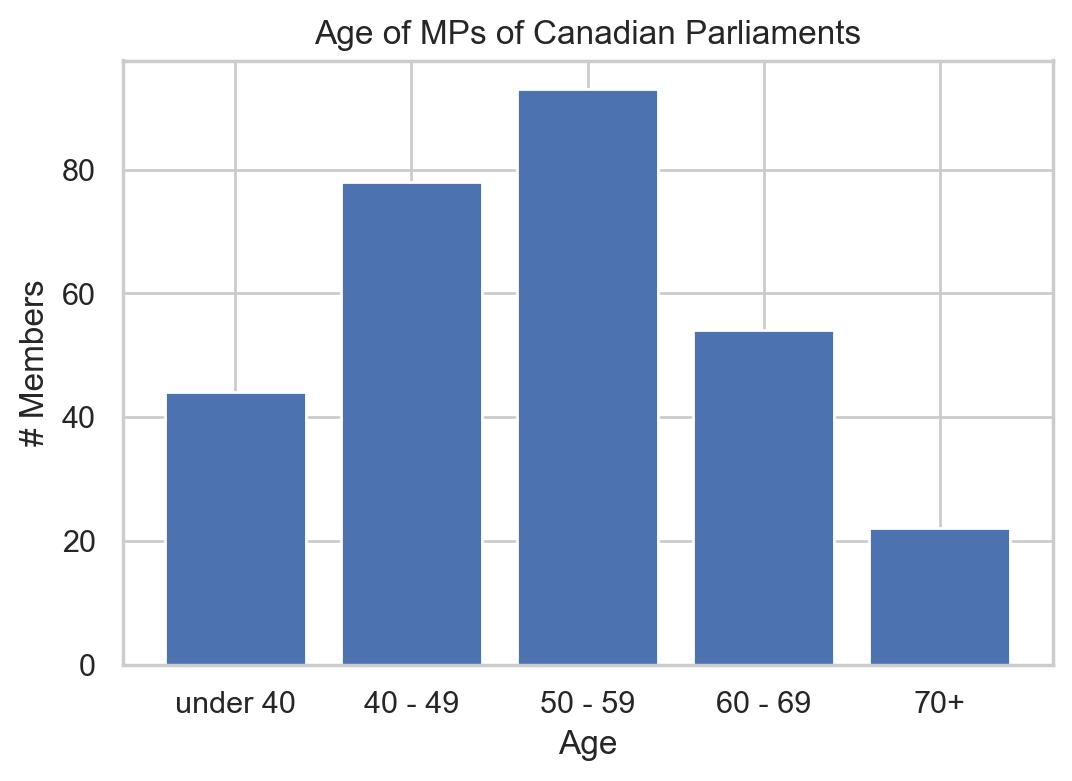

In [701]:
hist_data_ca_reps = graph_utils.graph_age_histogram(can_reps_with_age,
                                age_col='new_age',
                                y_axis_label='# Members',
                                title='Age of MPs of Canadian Parliaments')

## Canadian vs US Reps

In [707]:
for row in hist_data_us_reps:
    row['country'] = 'US'
    row['num_reps'] = row.pop('num_senators')
    
for row in hist_data_ca_reps:
    row['country'] = 'Canada'
    row['num_reps'] = row.pop('num_senators')

In [708]:
hist_rows = hist_data_us_reps + hist_data_ca_reps
hist_data = pd.DataFrame(hist_rows)
hist_data

,age_range,country,num_reps
0,under 40,US,25
1,40 - 49,US,79
2,50 - 59,US,112
3,60 - 69,US,127
4,70+,US,88
5,under 40,Canada,44
6,40 - 49,Canada,78
7,50 - 59,Canada,93
8,60 - 69,Canada,54
9,70+,Canada,22


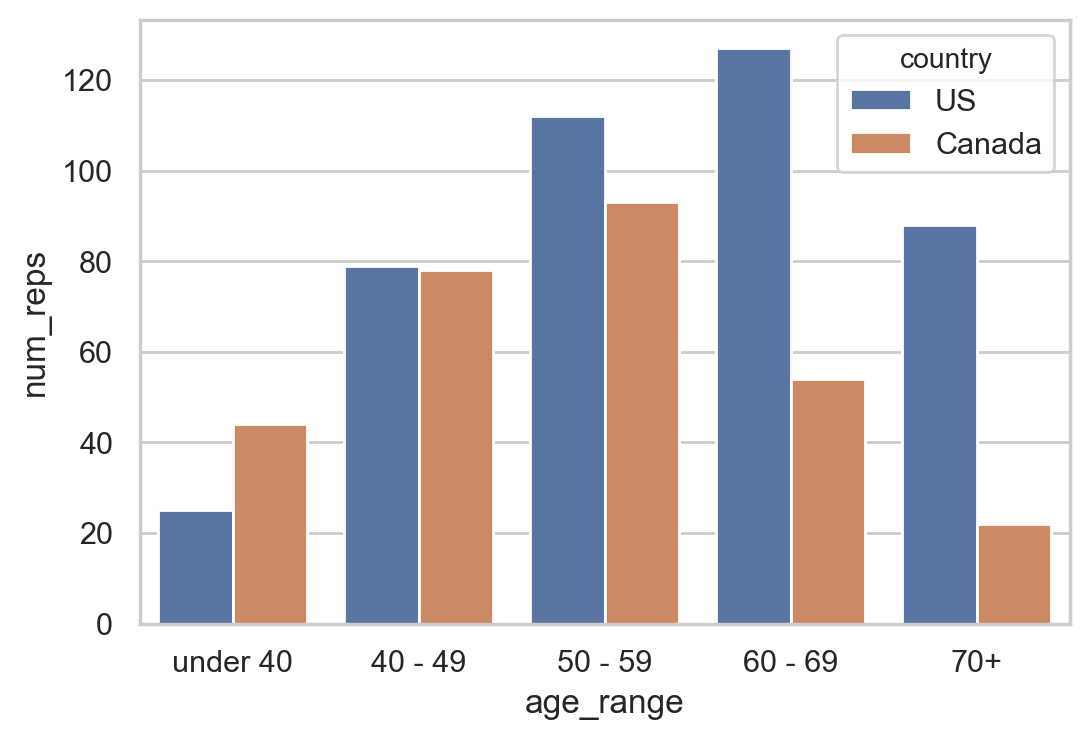

In [712]:
ax = sns.barplot(
    x='age_range',
    y='num_reps',
    hue='country',
    data=hist_data,
)